# Hypothesis testing and urban scaling laws

## Probabilistic approach to the linear regression

When fitting a linear model one should admit that the model's accuracy is not absolute: 
$$
y=w_1 x + w_0 +\varepsilon,\hspace{5ex} (1)
$$
where $\varepsilon$ is the model's error (often called noise or residual) or 
$$
y=w^T x +\varepsilon,\hspace{5ex} (2)
$$
for the multivariate case with $x$ being an $n$-dimentional vector.

Uncertainty of the model (1) prediction can be expressed by considering $\varepsilon$ as a random variable representing deviations of the actual values of $y$ from the estimates provided by the precise linear model. A basic assumption is to have $\varepsilon\sim{\cal N}(0,\sigma^2)$ (mean is zero as otherwise the intercept term $w_0$ could be corrected accordingly). 

Often observations $y_i,x_i$ are spread in time ($i$ - could be time of the observation). 
Classical regression assumptions (Gauss-Markov): $\sigma$ is the same for all observations (does not depend on time) and errors $\varepsilon_i$ following ${\cal N}(0,\sigma^2)$ are mutually uncorrelated, i.e. $cov(\epsilon_i,\epsilon_j)=0$ for $i\neq j$. 

An alternative way of representing this linear model is by considering $y$ as a random variable and expressing it's conditional probability density function with respect to given $x$ and $w$ as
$$
p(y|x,w)={\cal N}(y|w_1 x+w_0,\sigma^2).\hspace{5ex} (3)
$$

This way it is actually the mean of the distribution (3) which is predicted by a linear model.
Now the problem is to fit unknown parameters of the model $w_1,w_0,\sigma$ (the last one $\sigma$ represents how usually close are the values of $y$ to the linear prediction), so that the model is the most consistent with the training data $\{(x_j,y_j), j=1..N\}$.

Fitting could be done through maximizing the likelihood that the observed data $y_j$ actually follows the suggested distribution (3). Likelihood is defined as a product of probability density values $\prod\limits_j p(y_j|x_j)$. But it's actually more practical to maximize the log-likelihood (which is equivalent):
$$
\log\left(\prod\limits_j p(y_j|x_j)\right)=\sum\limits_j \log\left({\cal N}(y|w_1 x+w_0,\sigma^2)\right)=
$$$$
=-\sum\limits_j \frac{(y_j-w_1 x_j+w_0)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})\to\max
$$
Optimization with respect to $w$ turns out to be equivalent to the above least-square minimization. Then for minimal $RSS(\hat{w})$ acheived, $\sigma$ could be found from
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min
$$$$
\frac{\partial\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)}{\partial \sigma}=0,
$$$$
-\frac{RSS(\hat{w})}{\sigma^3}+\frac{N}{\sigma}=0,
$$$$
\sigma^2=\frac{RSS(\hat{w})}{N}.
$$
However often in order to account for the actual number of degrees of freedom in the model which is $N-2$ rather than $N$, the adjusted version of the above estimate is being used:
$$
\sigma^2=\frac{RSS(\hat{w})}{N-2}
$$

In case of the multi-variate regression the probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y-w^T x)^2}{2\sigma^2}}\hspace{5ex} (4).
$$

Given a training set $X=\{(x_j^i), j=1...n, i=1...N\}$, $Y=\{(y^i), i=1...N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1...N\}$), the max-likelihood criteria will take form:
$$
\prod\limits_i p(y^i|x^i,w,\sigma)\to \max.
$$
or
$$
\log\left(\prod\limits_i p(y^i|x^i,w,\sigma)\right)=\sum\limits_i \log\left({\cal N}(y^i|w^T x^i,\sigma^2)\right)=
$$$$
=-\sum\limits_i \frac{(y^i-w^T x^i)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})=-\frac{RSS(w)}{2\sigma^2}-N \log(\sigma)-N \to\max
$$
Which is in turn equivalent to
$$
RSS(w)\to \min,
$$
i.e. least-square criteria plus (just like in case of the bi-variate regression)
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min,
$$
i.e. the estimate $\hat{\sigma}$ could be found as
$$
\frac{\partial\left[\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\hat{\sigma})\right]}{\partial \hat{\sigma}}=0,
$$$$
-\frac{RSS(\hat{w})}{\hat{\sigma}^3}+\frac{N}{\hat{\sigma}}=0,
$$$$
\hat{\sigma}^2=\frac{RSS(\hat{w})}{N}. \hspace{5ex} (5)
$$

Also an unbiased adjusted estimate is known to be
$$
\hat{\sigma}^2=\frac{RSS(\hat{w})}{N-n}. \hspace{5ex} (5')
$$


### Confidence intervals
Uncertainty of the model predictions comes together with the uncertainty of the estimate for the model's coefficients estimates $w$. If we start from uncertainty of $y$ taking the observations for the output variable as normally distributed random variables, this leads to a multinomial normal distribution
$$
w\sim{\cal N}(\hat{w},\sigma^2(X^T X)^{-1})
$$
with an average $E[w]=\hat{w}$ and a variance-covariance matrix 
$$
Var(w)=\sigma^2(X^T X)^{-1}.
$$
However while using an estimate (5') for $\sigma=\hat{\sigma}=\sqrt{\frac{RSS(\hat{w})}{N-n}}$ we also have to admit its uncertainty rather than having $\sigma$ fixed which does not allow to consider a normal distribution for $w$ anymore. Instead one can have a Student's $t$-distributions with $N-n$ degrees of freedom for the standardized quantities
$$
z_j=\frac{w_j-\hat{w_j}}{\hat{\sigma} \sqrt{h_j}},
$$
where $h_j$ are the $j$-the diagonal elements of the matrix $(X^T X)^{-1}$.

This way the confidence intervals for each $\hat{w}_j$ given the confidence level $1-\alpha$ are constructred as
$$
P\left(w_j\in[\hat{w}_j-t_{\alpha/2}\sigma\sqrt{h_j},\hat{w}_j+t_{\alpha/2}\sigma\sqrt{h_j}]\right)=1-\alpha
$$
where $t_{\alpha/2}$ are quantiles of the $t$-distribution, i.e. such values that
$$
P(|z_j|\leq t_{\alpha/2})=1-\alpha
$$


### Hypothesis testing: P-values, t-statistics

Considering the statistical significance of each regressor $w_j$ we evaluate the hypothesis
$$
H_1:w_j\neq w_j^0
$$
vs a null-hypothesis
$$
H_0:w_j=w_j^0.
$$
When $w_j^0=0$ this means that we are trying to validate the statistical significance of the non-zero impact of the considered regressor $w_j$. For that purpose we consider a $t$-statistics
$$
t=\frac{w_j-w_j^0}{\hat{\sigma} \sqrt{h_j}}.
$$
If $|t|>t_{\alpha/2}$ (where $t_{\alpha/2}$ is a quantile of the t-distribution which is approximately standard normal for large number of observations) this means that the hypothesis $H_0$ is too unlikely and should be rejected with the confidence level $1-\alpha$.

A $p$-value on the other hand is virtually speaking giving us such an $\alpha$ based on the observed $t$, i.e. expressed the probability
$$
P(|z|>|t|)
$$
of having a $z$ randomly produced by the distribution corresponding to the null-hypothesis value $w_j=w_j^0$ with even higher $|z|$ compared to the observed $|t|$. This can be interpreted as a likelihood that the observed value of $t$ is got just by chance given $w_j=w_j^0$. If this likelihood is lower than a certain threshold value (usually $5\%$) this is interpreted as having an equation $w_j=w_j^0$ too unlikely, i.e. having to reject the hypothesis $H_0$. Otherwise, if $p-value$ is higher than a threshold value ($>5\%$) this means that the null-hypothesis can not be rejected with sufficient confidence (of at least $95\%$) so this might be the case that the regressor does not have a significant impact. 

It is important to understand that $p$-value is not supposed to prove any specific estimate for the coefficient $w_j$ - it can only make us confident (or uncertain on the contrary) that $w_j\neq 0$ (or different from another value of interest). Also having a low $p$-values do not prove that the impact of $x_i$ on $y$ is actually linear. In turn, having high $p$-value by itself does not prove that $y$ is independent on $x_i$ (first of all - a linear impact could still be there despite being seen as unlikely, just disguised by noise; second - the actual impact could be non-linear, i.e. not subject to being described by a linear model; third - an impact of the considered regressor might be affected by an overlap with the impact of the other regressors, so it might not be impactful after others are considered, but it might still be impactful by itself.

Regressors having high $p$-values are usually not included into the final model in order to stay free from the random insignificnt effects, reducing the risk of overfitting. This is however not the only way of fighting it. Also sequentually excluding regressors based on their $p$-values is not necessarily the best way of the feature selection as high $p$-values might result from multicollinearity, i.e. from having an impact of the considered regressor overlap with the impact of others. And it might happen that excluding other regressors in the first place will better help with fighting the overfitting and also might lead to the decrease of the $p$-values of the remaining regressors as a result.

### Hypothesis testing: F-statistics

However often we need to test the significance of a subgroup of regressors together (or all of the regressors) testing the entire model against the null-hypothesis that a model based on a smaller subset of $m$ regressors (or just the intercept) of the regressors actually performs not worse than the original one.  The following $F$-statistics helps with that:
$$
F=\frac{(RSS_0-RSS_1)(N-n)}{RSS_1\cdot (n-m)},
$$
where $RSS_1$ is the optimal (least-square) $RSS$ value for the original regression and $RSS_0$ - is the optimal $RSS$ value of the regression based on the considered subset of $m$ regressors (testing the hypothesis that only those $m$ regressors are significant). If we only consider a cumulative impact of all the regressors vs a trivial regression having just the intercept, then $m-1$ and $F$-statitics could be expressed through $R^2$:
$$
F=\frac{R^2 (N-n)}{(1-R^2)(n-1)}.
$$
R and python will report the value of $F$ for the null-hypothesis that only the intercept is significant, as well as the $p$-value characterizing this $F$-statistics.

If $F$-statistics above is a critical value corresponding to a certain level of confidence $1-\alpha$ (or if the corresponding $p$-value is below the threshold $\alpha$ one rejects the null-hypothesis of having all the considered regressors together insignificant. Otherwise this hypothesis can not be rejected, so it might be the case that regressors do not really have an impact. But once again $F$-statistics can not prove any specific estimates for the coefficients, nor can it prove a linear impact of those regressors.

In [1]:
#loading pandas package to load and clean the data
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


During this lab we will work with American community servey and crime data to establish and visualize relations between wealth, population and crime for US cities.

## Urban scaling laws

According to G.West and colleagues [Bettencourt, L.M., Lobo, J., Helbing, D., Kühnert, C. and West, G.B., 2007. Growth, innovation, scaling, and the pace of life in cities. Proceedings of the national academy of sciences, 104(17), pp.7301-7306.] many urban quantities scale superlinearly or underlinearly with city size. This means they follow the law 
$$
Y\sim C \cdot{\rm Population}^q
$$ 
with $q>1$ (for productivity metrics) or $q<1$ (for infrastructural metrics). 

Meaning that e.g. once the city becomes twice bigger it becomes more than twice wealthier, more innovative etc. And it takes less than twice the amount of infrastructure!

Below we will establish a scaling relationship between total income/crime vs population for US cities. 

And although scaling relationship is non-linear, linear regression can perfectly help. Just take log-scale:
$$
log(Y)\sim q\cdot \log(Population)+\log(C)
$$
and think of it as a bi-variate linear regression of $log(Y)$ vs $log(Population)$ with a slope coefficient $q$ and intercept $log(C)$.

We will perform this regression asking a question if $q$ is substantially different from $1$ or if $q=1$ could be the right model? 

First read the data on MSA's as well as population, income (as per American Community Survey) and crime statistics and aggregate demographics and crime by MSA

In [2]:
#load data on US Metropolitan statistical areas (one of the definitions of a city)
msa = pd.read_csv('Data/msalist.csv', encoding = "ISO-8859-1", engine='python')
msa.head()

,msa,msa_name,Geo_FIPS,county
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX"
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX"
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX"
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH"
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH"


The dataframe containts the counties that belong to each MSA, identified by Geo_FIPS code 

In [3]:
#create dictionary of msa names by their code
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [4]:
#we have 382 MSA's
len(msa.msa.unique())

382

In [5]:
#we have 1147 counties that belong to MSA's (out of the total of move than 3000 counties)
len(msa.Geo_FIPS.unique())

1147

load demographics by FIPS geographical subdivision
provided by ACS 2014 data: https://www.census.gov/acs/www/data/data-tables-and-tools/data-profiles/2014/

In [8]:
demographics = pd.read_csv('Data/ACS2014.csv', encoding = "ISO-8859-1", engine='python')

In [9]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [10]:
#add cumulative city income
demographics['Income']=demographics.Population*demographics['Per capita income']

In [11]:
demographics.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350,470514650
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145


In [12]:
len(demographics.Geo_GEOID.unique())

3220

In [13]:
sum(demographics.Population) #cumulative population in demographics data

317746049

In [14]:
#convert some location identifiers from string to numeric
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [15]:
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]

Now look at the final data per MSA we have (we keep those separate as not all the msa's are covered equally in demographics and crime datasets

In [16]:
msaDemo.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


### Q1. Run a simple linear regression of income vs population, without intercept, visualize the fit

In [17]:
#Performing OLS regression
lm = smf.ols('Income~Population-1', data=msaDemo).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          2.108e+04
Date:                Sun, 26 Dec 2021   Prob (F-statistic):                        0.00
Time:                        08:56:28   Log-Likelihood:                         -9159.2
No. Observations:                 379   AIC:                                  1.832e+04
Df Residuals:                     378   BIC:                                  1.832e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  3.245e+04    223.455    145.197      0.000     3.2e+04    3.29e+04
==============================================================================
Omnibus:                      344.787   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27704.925
Skew:                           3.344   Prob(JB):                         0.00
Kurtosis:                      44.348   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No handles with labels found to put in legend.


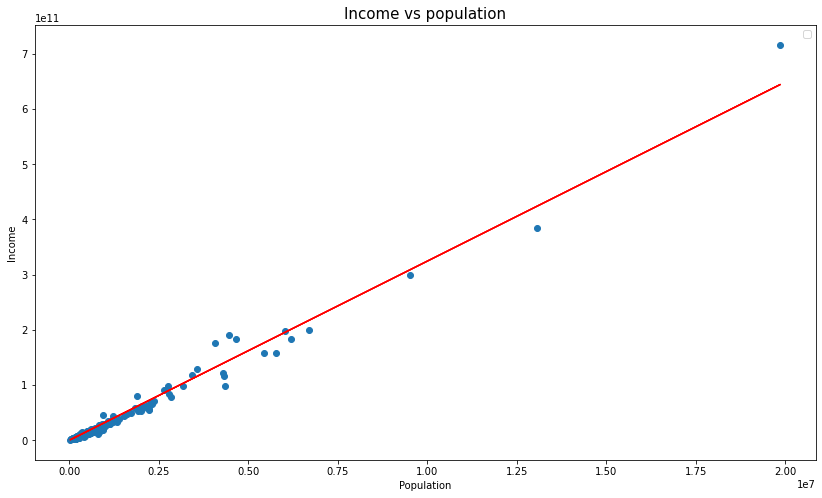

In [18]:
#Visualizing the regression fit
plt.figure(figsize=(14,8))
plt.plot(msaDemo['Population'], msaDemo['Income'], 'o')
plt.title('Income vs population', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Income')
plt.plot(msaDemo['Population'], lm.predict(), '-r')
plt.legend()

### Q2 Take the log-scale of income and population and repeat the regression, now with intercept

In [19]:
logPop = np.log(msaDemo['Population'])
logIncome = np.log(msaDemo['Income'])
dataLog = pd.DataFrame({'logIncome':logIncome, 'logPop':logPop})
dataLog.head()

,logIncome,logPop
msa,,
10180,22.042361,12.026773
10420,23.696755,13.463136
10500,21.877653,11.962127
10540,21.650141,11.680725
10580,24.058264,13.682627


In [20]:
#Performing OLS regression
lmIncome = smf.ols('logIncome~logPop', data=dataLog).fit()
lmIncome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logIncome   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.157e+04
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:56:30   Log-Likelihood:                 175.13
No. Observations:                 379   AIC:                            -346.3
Df Residuals:                     377   BIC:                            -338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3549      0.092    101.819      0.000       9.174       9.536
logPop         1.0633      0.007    146.865      0.000       1.049       1.078
==============================================================================
Omnibus:                       19.243   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.781
Skew:                           0.021   Prob(JB):                     2.10e-12
Kurtosis:                       4.845   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No handles with labels found to put in legend.


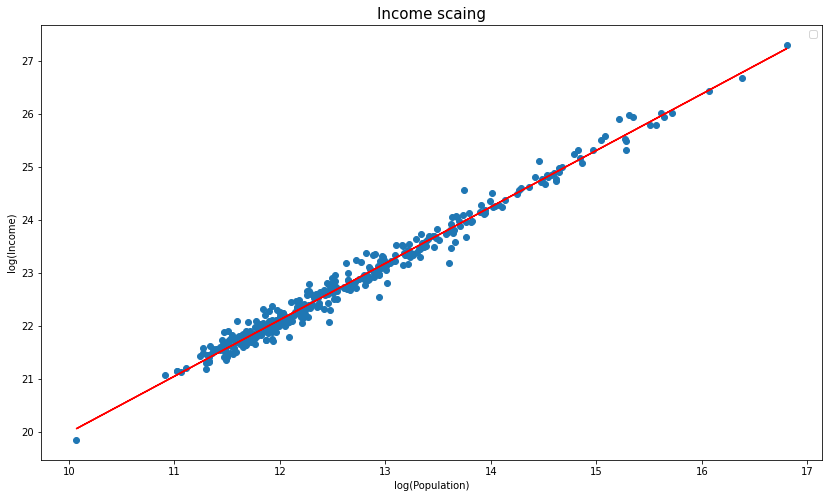

In [21]:
#Visualize the income scaling law
plt.figure(figsize=(14,8))
plt.plot(dataLog['logPop'], dataLog['logIncome'], 'o')
plt.title('Income scaing', fontsize = 15)
plt.xlabel('log(Population)')
plt.ylabel('log(Income)')
plt.plot(dataLog['logPop'], lmIncome.predict(), '-r')
plt.legend()

This means $$log(Income)=1.0633 log(Population)+9.3549$$ or $$Income=exp(9.3549) Population^{1.0633}$$

Does it mean the actual dependency of Income vs Population is actually a power law rather than a linear relationship? The estimate $q=1.0633$ for the exponent is somewhat close to 1. Is the conclusion that $q>1$ statistically significant?

In [22]:
#if a city is 100 times larger its not 100 but 134 times wealthier
100**1.0633

133.84433676499071

As the confidence intervals tells us, we're 95% confident that the exponent $q$ of the scaling law is between [1.049, 1.078], i.e. above 1.

**This way we can reject the hypothesis that $q=1$ at the 95% confidence level**

In [23]:
#where does the confidence interval come from? Illustrate idea of the uncertainty in the model estimates using the experiment below.

In [24]:
#perform regression on 100 subsamples
np.random.seed(2019)
W=[]
for i in range(0,100):
    df=dataLog.sample(frac=0.5)
    lm = smf.ols(formula='logIncome~logPop', data = df).fit()
    W+=[lm.params.logPop]

In [25]:
print('{}+-{}'.format(np.array(W).mean(),np.array(W).std()))

1.0632614987565108+-0.006389464050779122


But mind the fact that variance will actually depend on the sample sizes and there is no direct correspondence - it was coincidental that the std of our experiments largely matched standard error reported in the regression summary. Those are different concepts. This experiment is just an illustration of the idea. A more robust way of explaining it would employ Bayesian thinking:
Consider a regression $$y\sim w\cdot x$$ or its probabilistic form $y\sim N(wx,\sigma^2)$ given the observed $Data$. Then one can assess the joint likelihood of the $Data=\{(x^i,y^i)\}$ given the choice of the model coefficient $w$ as
$$
p(Data|w)=\prod\limits_i p(y^i|w x^i,\sigma^2)\sim{\rm exp}\left(\sum\limits_i \frac{-(y^i-w x^i)^2}{2\sigma^2}\right).
$$
Using Bayes theorem one could flip it into
$$
p(w|Data)=\frac{p(Data|w)p(w)}{p(Data)}.
$$
While $p(Data)$ does not depend on $w$ one can use the relationship above to infer not only a single estimate for $w$ but the entire probabilistic distribution for it to be proportional to the product of the likelihood above $p(Data|w)$ and our prior beliefs about $w$ expressed through $p(w)$. If we do not really have any we can assume $p(w)=const$ over a certain interval of reasonable values and then a distribution for $w$ could be defined through a simple proportionality relationship $p(w|Data)\sim p(Data|w)$ over this interval. Alternatively we can assume $p(w)=N(0,(\sigma^*)^2)$ with $\sigma^*$ large enough, which will lead to normal distribution for $p(w|Data)$ in case $\sigma^*$ were known upfront.

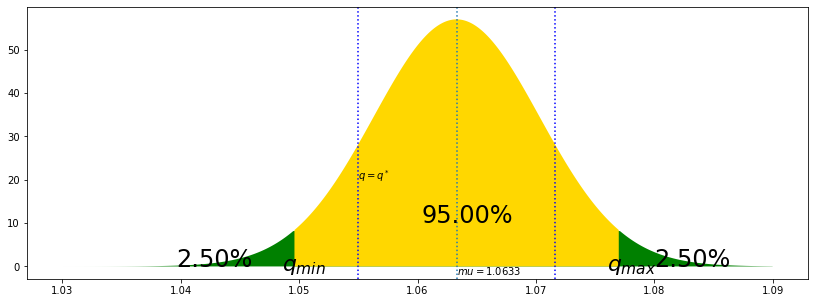

In [26]:
#returning to the example above use a normal distribution with mean 1.0633 
#and standard error 0.007 as reported by the regression
#in order to approximate p(q|Data) (in reality distribution is slightly more complex, but often reasonably close to normal - see below)
from scipy.stats import norm
mu=1.0633; sigma=0.007
q0=1.055
q = 0.05/2
x = np.arange(1.03,1.09,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
plt.axvline(x=q0,linestyle=':',c='b')
plt.axvline(x=2*mu-q0,linestyle=':',c='b')
ax.text(mu, -2, '$mu=1.0633$', fontsize = 10)
ax.text(q0, 20, '$q=q^*$', fontsize = 10)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(mu-0.003, 10, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
ax.text(t0-0.001, -1, '$q_{min}$', fontsize = 22)
ax.text(t1-0.001, -1, '$q_{max}$', fontsize = 22)
plt.show()

This plot shows the range of most 95% most likely values (accumulating 95% probability), i.e. the confidence interval. It also allows to asses how relatively likely a certain candidate value of $q=q^*$ is by measuring the volume (by probability) of all the values which are less likely thant $q^*$, i.e. those $q<q^*$ and $q>2\mu-q^*$.

More robustly, a standard regression framework gives that a quantity 
$$
t=\frac{w_j-w_j^0}{\hat{\sigma_j}}.
$$
(where $w_j^0$ and $\hat{\sigma_j}$ are the mean estimate and the standard error reported for the coefficient $w_j$) follows a so called t-distribution (approximately standard normal given a number of observations large enough) defined as below

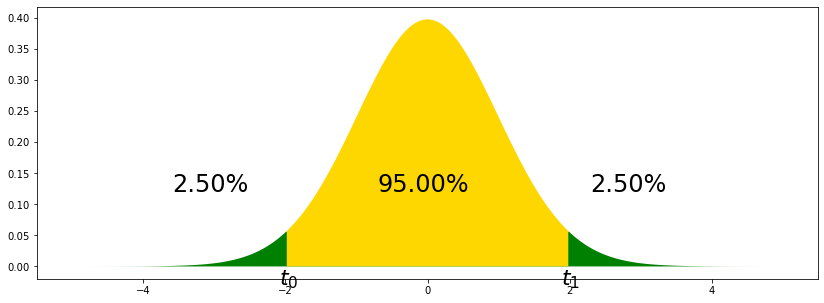

In [27]:
from scipy.stats import t
df_=100
q = 0.05/2
x = np.arange(-5,5,0.01)
y = t.pdf(x, df_)    # default setting with location parameter 0 and scale parameter 1
t0 = t.ppf(q, df_)   # lower bound
t1 = t.isf(q, df_)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
ax.text(t1+0.3, 0.12, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-1.6, 0.12, '%.2f%%'%(100*q), fontsize = 24)
ax.text(-0.7, 0.12, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
ax.text(t0-0.1, -0.03, '$t_0$', fontsize = 22)
ax.text(t1-0.1, -0.03, '$t_1$', fontsize = 22)
plt.show()

then the $1-\alpha$ (e.g. $95\%$ when $\alpha=5\%$) confidence interval is the one covering $1-\alpha$ (by probability density) of the most probable values of the distribution and excluding $\alpha$ (e.g. $5\%$) of the least probable values. 

In [28]:
#standard regression statistics provides only 95% confidence interval; here is another way of getting it for arbitary alpha
lmIncome.conf_int(alpha=0.05) # 95% CI

,0,1
Intercept,9.174235,9.535549
logPop,1.049105,1.077578


In [29]:
lmIncome.conf_int(alpha=0.01) # 99% CI

,0,1
Intercept,9.117027,9.592757
logPop,1.044597,1.082086


In [30]:
# so even with 99.9% confidence we can claim q>1
lmIncome.conf_int(alpha=0.001) # 99.9% CI

,0,1
Intercept,9.050178,9.659606
logPop,1.039329,1.087354


Another useful quantity for hypothesis testing is p-value. In short, say we have a null-hypothesis that $q=0$. Based on the probability distribution for the coefficient $q$, the $p-value$ it measures the probability of getting a value which no more likely than $q=0$. If the p-value is below a certain threshold (usually $\alpha=5\%$) we reject the null-hypothesis at the level of confidence $1-\alpha=95\%$ as it would mean that $q=0$ is among $5\%$ least likely values.

It does not mean that $q=0$ is not the right value for sure (there is still $5\%$ chance that this or even some less likely value is). It also does not mean that the regression estimate is the right value. It just means that values like $q=0$ are unlikely enough to not be reasonably anticipated. 

While typically the regression gives us p-value for the hypothesis $q=0$ in our case what we care about is $q=1$.

In [31]:
#the regression estimate above gives p-value for the null-hypothesis q=0. As it is not the one we need, lets adjust the regression to get the right one
dataLog['logIncomePerCapita']=dataLog['logIncome']-dataLog['logPop']
lm2 = smf.ols('logIncomePerCapita~logPop', data=dataLog).fit()
print(lm2.summary())
print('p-value={}'.format(lm2.pvalues.logPop))

                            OLS Regression Results                            
Dep. Variable:     logIncomePerCapita   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     76.54
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           7.30e-17
Time:                        08:56:34   Log-Likelihood:                 175.13
No. Observations:                 379   AIC:                            -346.3
Df Residuals:                     377   BIC:                            -338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3549      0.092    101.819      0.0

### Q3. Find the top 5 cities overperforming and underperforming cities by income (by log-scale difference from the trend)

Exponent of the log-scale residuals would show how many times does the city overperforming or underperforming in terms of income compared to the expected (predicted by the regresion) income for the city of that size 

In [32]:
msaDemo['msaName'] = msaDemo.index.map(msaNames) #add city names to the 

In [33]:
#compute the residuals
msaDemo['IncomePerCapita'] = msaDemo['Income'] / msaDemo['Population']
msaDemo['IncRes'] = dataLog['logIncome'] - lmIncome.predict()

In [34]:
msaDemo.sort_values(by='IncRes',ascending=False).head(5)

,Population,Area,Income,msaName,IncomePerCapita,IncRes
msa,,,,,,
14860,934215,624.889555,46419274920,"Bridgeport-Stamford-Norwalk, CT (Metropolitan ...",49688.0,0.587838
15680,108472,357.180046,3970292144,"California-Lexington Park, MD (Metropolitan St...",36602.0,0.418566
14500,305166,726.289252,11756214984,"Boulder, CO (Metropolitan Statistical Area)",38524.0,0.404226
12700,215167,393.723227,7953432988,"Barnstable Town, MA (Metropolitan Statistical ...",36964.0,0.385023
45940,369526,224.557494,14070071976,"Trenton, NJ (Metropolitan Statistical Area)",38076.0,0.380407


In [35]:
msaDemo.sort_values(by='IncRes',ascending=True).head(5)

,Population,Area,Income,msaName,IncomePerCapita,IncRes
msa,,,,,,
32580,806447,1570.865088,11713642675,"McAllen-Edinburg-Mission, TX (Metropolitan Sta...",14525.0,-0.632738
15180,415103,890.922380,6184204494,"Brownsville-Harlingen, TX (Metropolitan Statis...",14898.0,-0.565317
29700,259471,3361.482188,3853663292,"Laredo, TX (Metropolitan Statistical Area)",14852.0,-0.538646
20940,177026,4176.603407,2904819634,"El Centro, CA (Metropolitan Statistical Area)",16409.0,-0.414732
47300,451108,4824.214846,8069419904,"Visalia-Porterville, CA (Metropolitan Statisti...",17888.0,-0.387682


## Homework

### task 1. Establish a scaling relationship $Y\sim C X^q$ between total crime vs population 
(by running log-scale regression filtering out the data points with Crime=0 if any). Visualize on the log scale. Does $q=1$ fall into the 95% confidence interval? What about 99% CI?

In [38]:
#first load the data and perform some cleaning
crime2014 = pd.read_csv('Data/R11460954_SL050.csv', encoding = "ISO-8859-1", engine='python') #Load crime data

In [39]:
#rename some columns
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                          u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes', 'Violent Crimes', 'Property Crimes']].copy()

In [40]:
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes
0,01001,Autauga County,1,001,55395.0,482,68,414
1,01003,Baldwin County,1,003,200111.0,760,98,662
2,01005,Barbour County,1,005,26887.0,145,17,128
3,01007,Bibb County,1,007,22506.0,86,4,82
4,01009,Blount County,1,009,57719.0,1013,90,923


In [41]:
sum(crime2014.Population)

250424654.0

In [42]:
#convert some location identifiers from string to numeric
def num(s):
    try:
        return int(s)
    except ValueError:
        0

crime2014['ID'] = crime2014.Geo_FIPS.apply(num)

crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [43]:
#create a dataframe with the population and total violent and property crime per each MSA
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', 'Crimes', u'Violent Crimes', u'Property Crimes']]
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


In [44]:
logPop = np.log(msaCrime['Population'])
logCrime = np.log(msaCrime['Crimes'])
dataLog = pd.DataFrame({'logCrime':logCrime, 'logPop':logPop})
dataLog = dataLog[dataLog['logCrime']!=-np.Inf]
dataLog.head(1)

,logCrime,logPop
msa,,
10180,6.198479,12.035237


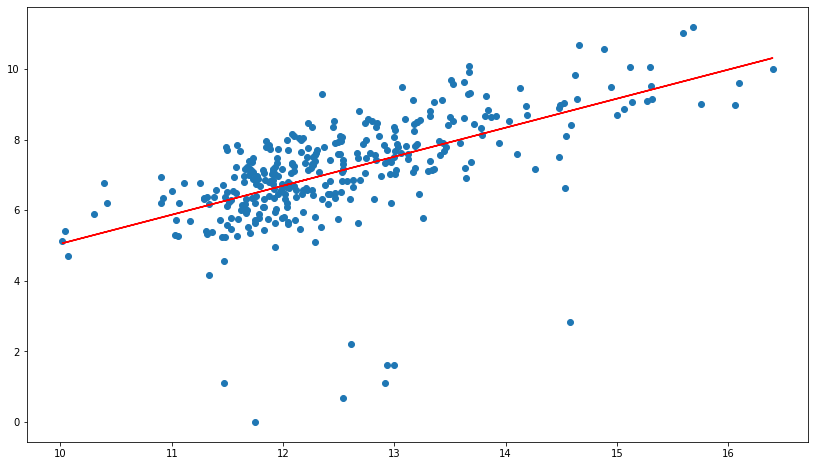

In [45]:
lm = smf.ols('logCrime~logPop', data=dataLog).fit()
plt.figure(figsize=(14,8))
plt.plot(dataLog['logPop'],dataLog['logCrime'], 'o')
plt.plot(dataLog['logPop'], lm.predict(), '-r')
plt.show()

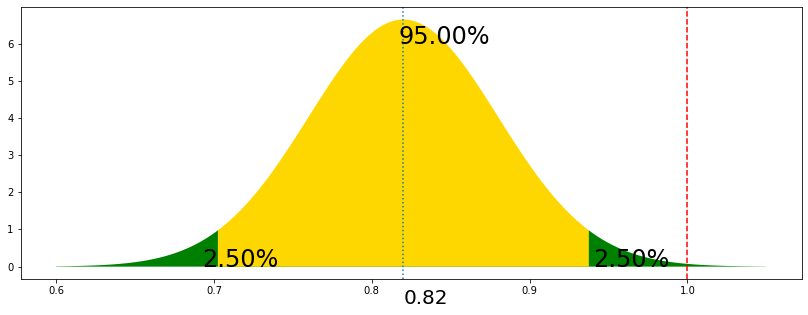

In [46]:
mu=round(lm.params.logPop, 2) 
sigma=round(lm.bse.logPop, 2) 
q0=mu-sigma
q = 0.05/2
x = np.arange(0.6,1.05,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
ax.text(mu, -1, mu, fontsize = 20)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(mu-0.003, 6, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
plt.axvline(1,color='r',linestyle='--')
plt.show()

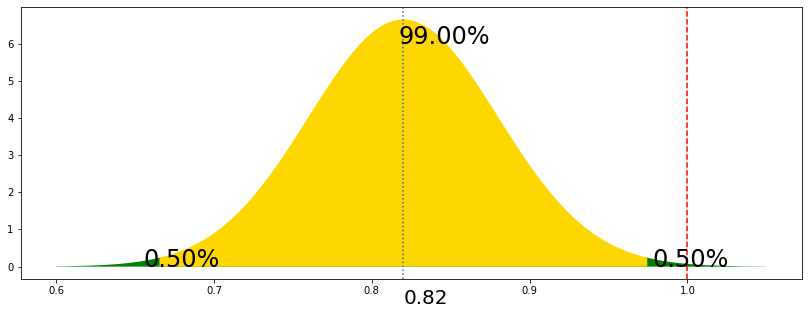

In [47]:
mu=round(lm.params.logPop, 2) 
sigma=round(lm.bse.logPop, 2) 
q0=mu-sigma
q = 0.01/2
x = np.arange(0.6,1.05,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
ax.text(mu, -1, mu, fontsize = 20)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(mu-0.003, 6, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
plt.axvline(1,color='r',linestyle='--')
plt.show()

<span style="font-size:18pt; color:red">q=1  not fall into the 95% and 99% confidence interval. Reject Hypothesis</span>.

### task 2. Find top 5 and last 5 cities by crime log-residual 
(difference between log-violent crime and above regression prediction)

In [48]:
dataLog['crimesPerCapita'] = dataLog['logCrime'] / dataLog['logPop']
dataLog['crimesRes'] = dataLog['logCrime'] - lm.predict()
dataLog.sort_values(by='crimesRes',ascending=False).head(5)

,logCrime,logPop,crimesPerCapita,crimesRes
msa,,,,
31420,9.294773,12.347789,0.752748,2.315198
24860,10.098890,13.667548,0.738896,2.034767
37860,9.490545,13.069133,0.726180,1.918185
35380,9.919656,13.673404,0.725471,1.850721
36740,10.683661,14.657689,0.728878,1.805863


In [49]:
dataLog.sort_values(by='crimesRes',ascending=True).head(5)

,logCrime,logPop,crimesPerCapita,crimesRes
msa,,,,
11020,0.000000,11.743680,0.000000,-6.483133
21500,0.693147,12.536969,0.055288,-6.441892
10900,1.098612,12.917970,0.085045,-6.349525
38300,2.833213,14.582882,0.194283,-5.983110
49620,1.609438,12.996244,0.123839,-5.903023


### task 3. Is there any correlation between residual by income and residual by the total crime?
Do the cities overperforming by wealth also typically over/underperform by crime?

In [50]:
c = dataLog.merge(msaDemo, right_index=True, left_index=True)
lm=smf.ols('crimesRes~IncRes', data=c).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              crimesRes   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     12.03
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           0.000590
Time:                        08:56:47   Log-Likelihood:                -536.15
No. Observations:                 337   AIC:                             1076.
Df Residuals:                     335   BIC:                             1084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0178      0.065     -0.274      0.784      -0.146       0.110
IncRes        -1.5335      0.442     -3.469      0.001      -2.403      -0.664
==============================================================================
Omnibus:                      223.214   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2297.842
Skew:                          -2.673   Prob(JB):                         0.00
Kurtosis:                      14.621   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="font-size:18pt; color:red">Reject Hypothesis because pvalue = 0.001 \< 0.05. They have significant correlation</span>

<span style="font-size:18pt; color:red">Underperform the crime because coef are negative </span>